In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankel boot']

In [4]:
# Exploring the Data

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [5]:
# Preprocessing

def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#Caching the datasets so that they remain in memory for faster access
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

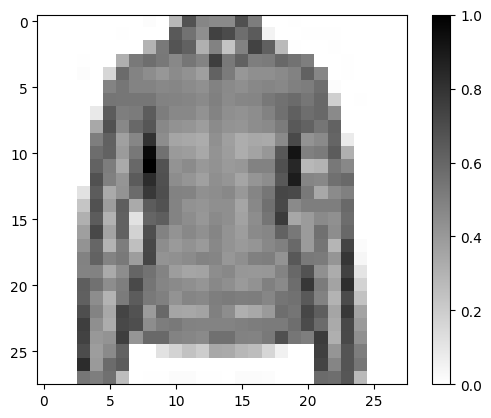

In [6]:
# Exploring the Processed Data
# Taking a single image and emoving the color dimension by reashaping
for image,label in test_dataset.take(1):
    break

image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

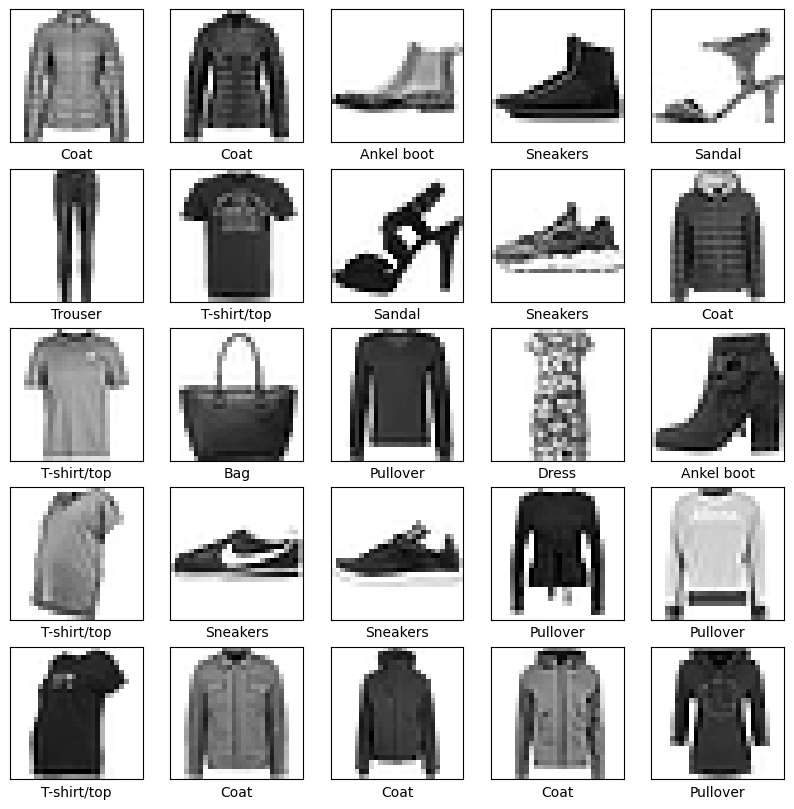

In [7]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [8]:
# Model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\Arnav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])

In [10]:
# Tain the Model

BATCH_SIZE = 32
train_dataset_random = train_dataset.cache().repeat().shuffle(num_test_examples).batch(BATCH_SIZE)
test_dataset_random = test_dataset.cache().batch(BATCH_SIZE)

In [11]:
import math

In [12]:
model.fit(train_dataset_random, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7990 - loss: 0.5469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9005 - loss: 0.2736
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9182 - loss: 0.2250
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9276 - loss: 0.1934
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9415 - loss: 0.1572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9511 - loss: 0.1352
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9571 - loss: 0.1134
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9637 - loss: 0.0964
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9709 - loss: 0.0757
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.0651


In [13]:
# Evaluate

test_loss, test_accuacy = model.evaluate(test_dataset_random, steps=math.ceil(num_test_examples/32))
print('Accuracy on Test Dataset: {}'.format(test_accuacy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.2982
Accuracy on Test Dataset: 0.9180999994277954


In [14]:
for test_images, test_labels in test_dataset_random.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [15]:
predictions.shape

(32, 10)

In [16]:
predictions[0]

array([9.1905179e-08, 2.5626894e-12, 1.6933508e-03, 1.1004452e-08,
       7.5470746e-01, 3.9974950e-12, 2.4359886e-01, 1.7614327e-09,
       9.4599018e-10, 2.3773640e-07], dtype=float32)

In [17]:
np.argmax(predictions[0])

4

In [18]:
test_labels[0]

4

In [19]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

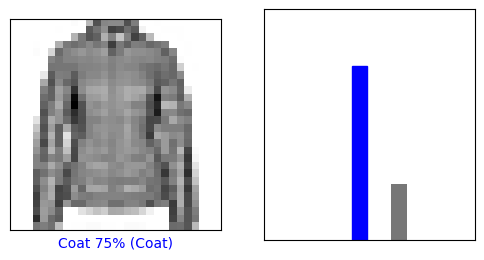

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

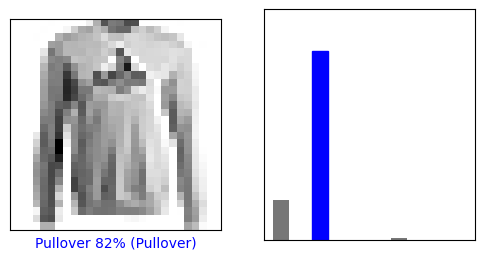

In [21]:
i = 28
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

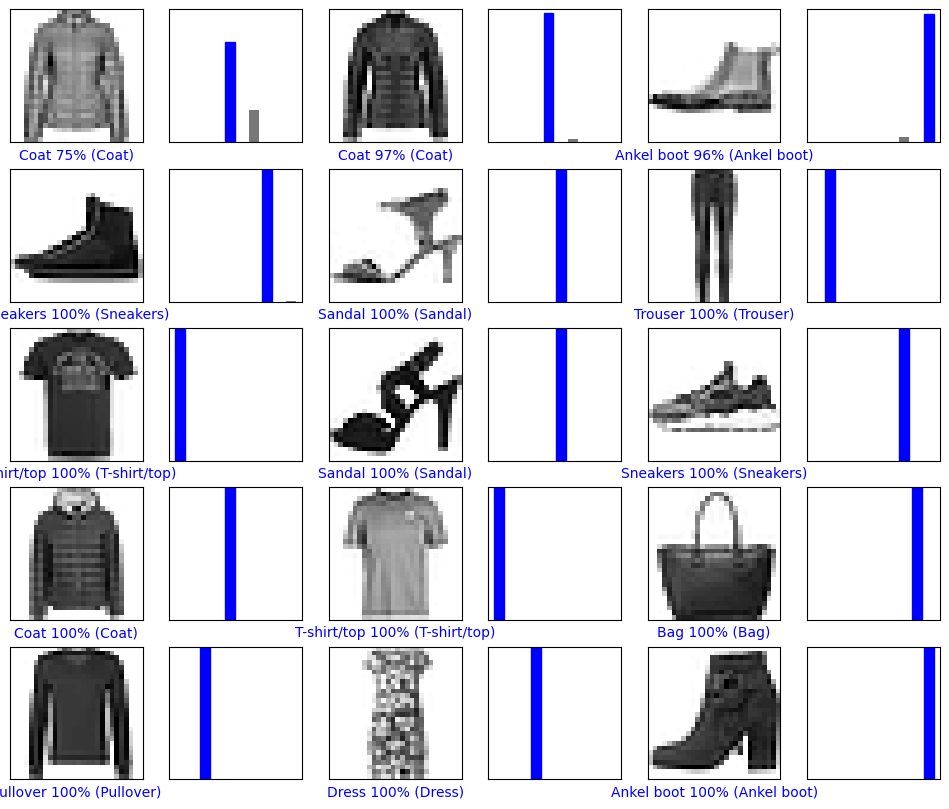

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [28]:
img = test_images[4]
print(img.shape)

(28, 28, 1)


In [29]:
# Add the image to a batch where it's the only member
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [30]:
predictions_single = model.predict(img)
print(predictions_single)
np.argmax(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[1.29361566e-18 2.50326013e-17 1.28005414e-23 1.28068710e-26
  2.36801425e-25 1.00000000e+00 1.36166611e-21 6.28349865e-19
  2.81934398e-20 1.88146902e-16]]


5

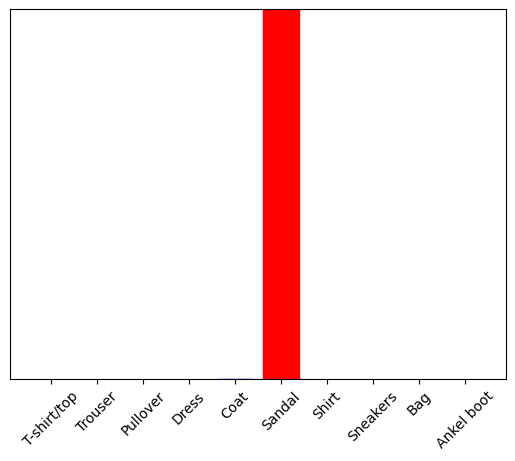

In [31]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=45)